<a href="https://colab.research.google.com/github/mihika073/Deeplearning/blob/main/DeepLearningTwitterProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Twitter Classification (Fall 2022)


-----------------------------------------------
Can deep learning 'steal' the logic of rules-based sentiment analysis packages? In this project, you will see if a deep learning model can replicate the scores of a well-known sentiment analysis scoring model called 'Sentiment Intensity Analyzer' from the nltk package.

For this project, you are provided with a function to scrape tweets of certain users on Twitter. Use the function to scrape 1000 tweets (or more! 2000 is better) for any person(s) or organization(s) you are interested in. You then feed these Tweets into the `nltk SentimentIntensityAnalyzer()` and generate [four sentiment scores: positive, negative, neutral and composite](https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk). You will use these scores as your target variables (a neural network with 4 outputs) and try to predict them by just using the words in the Tweets!




## Import modules

In [ ]:
# import modules
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# need to add nltk imports up here
# link: https://www.nltk.org/
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Part I : Data Preparation

##Problem Statement

In the world of news media, CNN International and BBC International are well-known names. The polarization that commercialized news creates is constantly debated. CNN and BBC are two of the most debated news media outlets. In terms of reach, BBC has a wider audience, while CNN carries a stronger brand. We thought it might be interesting to analyze Tweets from a trusted public news organization and a trusted private news organization for sentiment analysis and classification.

## Mounting the Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# you will write to a Google Drive, not your local drive!

## Creating folders for CNN and BBC news

In [ ]:
# code to remove files in the directory
# import os
# mydir = '/content/BBC'
# filelist = [ f for f in os.listdir(mydir) if f.endswith(".csv") ]
# for f in filelist:
#     os.remove(os.path.join(mydir, f)) 

In [ ]:
# make a folder to store data
base_dir = '/content/'

import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
CNN_dir = base_dir + '/CNN/'

#Create the second directory
tf.io.gfile.mkdir(CNN_dir)

In [ ]:
# make a folder to store data
base_dir = '/content/'

import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
BBC_dir = base_dir + '/BBC/'

#Create the second directory
tf.io.gfile.mkdir(BBC_dir)

## Tweet Scrapping

In [ ]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 1.9 MB/s 


In [ ]:
#BBC World Tweets
maxTweets = 1000

# make sure you update the username and number of tweets!
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@BBCWorld + since:2008-12-01 until:2022-12-01-filter:links -filter:replies').get_items()):
  csvFile = open(BBC_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

In [ ]:
#CNN International Tweets
maxTweets = 1000

# make sure you update the username and number of tweets!
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@cnni + since:2008-12-01 until:2022-12-01-filter:links -filter:replies').get_items()):
  csvFile = open(CNN_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

## Merging files into a single .csv file

In [ ]:
#Checking one tweet in BBC folder
df = pd.read_csv("/content/BBC/0.csv")
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1 non-null      int64 
 1   date    1 non-null      object
 2   tweet   1 non-null      object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [ ]:
import os
#read the path
file_path_BBC = "/content/BBC"
#list all the files from the directory
file_list_BBC = os.listdir(file_path_BBC)
file_path_CNN = "/content/CNN"
file_list_CNN = os.listdir(file_path_CNN)

In [ ]:
file_path_BBC

'/content/BBC'

In [ ]:
#Add BBC data to dataframe
df = pd.DataFrame()
for file in file_list_BBC:
  path=file_path_BBC+'/'+file
  df_temp = pd.read_csv(path)
  df = df.append(df_temp, ignore_index=True)
  
df['BBC']=1   
df.tail()

,id,date,tweet,BBC
996,1595414380958588929,2022-11-23 13:50:04+00:00,Twenty children killed when school collapsed i...,1
997,1592148617896243200,2022-11-14 13:33:05+00:00,At least three killed in US university shootin...,1
998,1597728882572103681,2022-11-29 23:07:04+00:00,Suitcase murder-suspect due before NZ court ht...,1
999,1591158596183752720,2022-11-11 19:59:06+00:00,Batman voice actor Kevin Conroy dies aged 66 h...,1
1000,1593738935171223552,2022-11-18 22:52:27+00:00,Is this really the end of Twitter? https://t.c...,1


In [ ]:
#Add CNN data to dataframe
for file in file_list_CNN:
  path=file_path_CNN+'/'+file
  df_temp = pd.read_csv(path)
  df = df.append(df_temp, ignore_index=True) 
df['BBC'].fillna(0,inplace=True)
df.tail()

,id,date,tweet,BBC
1997,1595598105583435776,2022-11-24 02:00:07+00:00,A two-day-old baby died in a Russian strike on...,0.0
1998,1592442318275035139,2022-11-15 09:00:09+00:00,The world’s three largest rainforest nations B...,0.0
1999,1597699639079206912,2022-11-29 21:10:52+00:00,JUST IN: The United States defeats Iran 1-0 to...,0.0
2000,1591785486036570112,2022-11-13 13:30:08+00:00,England won the T20 World Cup Final in sensati...,0.0
2001,1593946813811277824,2022-11-19 12:38:29+00:00,Proof that dogs really are man’s best friend h...,0.0


In [ ]:
df.to_csv('final_dataset.csv')

In [ ]:
df_raw=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2002 non-null   object 
 1   date    2002 non-null   object 
 2   tweet   2002 non-null   object 
 3   BBC     2002 non-null   float64
dtypes: float64(1), object(3)
memory usage: 62.7+ KB


## EDA & Word Cloud

In [ ]:
from keras.utils import pad_sequences

In [ ]:
df['tweet'].head()

0    "I was going through something that night... I...
1    US President Joe Biden plans to meet Prince Wi...
2    Anger in China at reports baby died due to Cov...
3    Police unprepared for Tanzania plane crash res...
4    Delete photos or face arrest at Shanghai Covid...
Name: tweet, dtype: object

###Change to lowercase

In [ ]:
df['tweet_case_change']=df['tweet'].str.lower()
df['tweet_case_change'].head()

0    "i was going through something that night... i...
1    us president joe biden plans to meet prince wi...
2    anger in china at reports baby died due to cov...
3    police unprepared for tanzania plane crash res...
4    delete photos or face arrest at shanghai covid...
Name: tweet_case_change, dtype: object

In [ ]:
df.head(10)

,id,date,tweet,BBC,tweet_case_change
0,1597646721185611777,2022-11-29 17:40:35+00:00,"""I was going through something that night... I...",1.0,"""i was going through something that night... i..."
1,1598090530201735168,2022-11-30 23:04:08+00:00,US President Joe Biden plans to meet Prince Wi...,1.0,us president joe biden plans to meet prince wi...
2,1593524940032167936,2022-11-18 08:42:06+00:00,Anger in China at reports baby died due to Cov...,1.0,anger in china at reports baby died due to cov...
3,1595142594832613383,2022-11-22 19:50:05+00:00,Police unprepared for Tanzania plane crash res...,1.0,police unprepared for tanzania plane crash res...
4,1597213747059228672,2022-11-28 13:00:06+00:00,Delete photos or face arrest at Shanghai Covid...,1.0,delete photos or face arrest at shanghai covid...
5,1594565705680273408,2022-11-21 05:37:44+00:00,Ukraine war: Hope returns to Kherson after Rus...,1.0,ukraine war: hope returns to kherson after rus...
6,1597274140926529539,2022-11-28 17:00:05+00:00,World's largest active volcano erupts in Hawai...,1.0,world's largest active volcano erupts in hawai...
7,1594653550096916480,2022-11-21 11:26:48+00:00,Twitter boss Elon Musk keeps conspiracy theori...,1.0,twitter boss elon musk keeps conspiracy theori...
8,1593215899225714688,2022-11-17 12:14:05+00:00,Donald Trump has officially announced his inte...,1.0,donald trump has officially announced his inte...
9,1593235028493975552,2022-11-17 13:30:06+00:00,"Celtic ruler's ring goes under hammer for £36,...",1.0,"celtic ruler's ring goes under hammer for £36,..."


###Strip funky characters (!,~-@$% etc)

In [ ]:
# remove any funky characters with a blank
df['tweet_case_change'] = df['tweet_case_change'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df.head(10)

<ipython-input-22-700e842b61ad>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_case_change'] = df['tweet_case_change'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()


,id,date,tweet,BBC,tweet_case_change
0,1597646721185611777,2022-11-29 17:40:35+00:00,"""I was going through something that night... I...",1.0,i was going through something that night i jus...
1,1598090530201735168,2022-11-30 23:04:08+00:00,US President Joe Biden plans to meet Prince Wi...,1.0,us president joe biden plans to meet prince wi...
2,1593524940032167936,2022-11-18 08:42:06+00:00,Anger in China at reports baby died due to Cov...,1.0,anger in china at reports baby died due to cov...
3,1595142594832613383,2022-11-22 19:50:05+00:00,Police unprepared for Tanzania plane crash res...,1.0,police unprepared for tanzania plane crash res...
4,1597213747059228672,2022-11-28 13:00:06+00:00,Delete photos or face arrest at Shanghai Covid...,1.0,delete photos or face arrest at shanghai covid...
5,1594565705680273408,2022-11-21 05:37:44+00:00,Ukraine war: Hope returns to Kherson after Rus...,1.0,ukraine war hope returns to kherson after russ...
6,1597274140926529539,2022-11-28 17:00:05+00:00,World's largest active volcano erupts in Hawai...,1.0,worlds largest active volcano erupts in hawaii...
7,1594653550096916480,2022-11-21 11:26:48+00:00,Twitter boss Elon Musk keeps conspiracy theori...,1.0,twitter boss elon musk keeps conspiracy theori...
8,1593215899225714688,2022-11-17 12:14:05+00:00,Donald Trump has officially announced his inte...,1.0,donald trump has officially announced his inte...
9,1593235028493975552,2022-11-17 13:30:06+00:00,"Celtic ruler's ring goes under hammer for £36,...",1.0,celtic rulers ring goes under hammer for at au...


###Stop words

In [ ]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!
print(stopwords.words('english'))

stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head(10)

,id,date,tweet,BBC,tweet_case_change
0,1597646721185611777,2022-11-29 17:40:35+00:00,"""I was going through something that night... I...",1.0,i was going through something that night i jus...
1,1598090530201735168,2022-11-30 23:04:08+00:00,US President Joe Biden plans to meet Prince Wi...,1.0,us president joe biden plans to meet prince wi...
2,1593524940032167936,2022-11-18 08:42:06+00:00,Anger in China at reports baby died due to Cov...,1.0,anger in china at reports baby died due to cov...
3,1595142594832613383,2022-11-22 19:50:05+00:00,Police unprepared for Tanzania plane crash res...,1.0,police unprepared for tanzania plane crash res...
4,1597213747059228672,2022-11-28 13:00:06+00:00,Delete photos or face arrest at Shanghai Covid...,1.0,delete photos or face arrest at shanghai covid...
5,1594565705680273408,2022-11-21 05:37:44+00:00,Ukraine war: Hope returns to Kherson after Rus...,1.0,ukraine war hope returns to kherson after russ...
6,1597274140926529539,2022-11-28 17:00:05+00:00,World's largest active volcano erupts in Hawai...,1.0,worlds largest active volcano erupts in hawaii...
7,1594653550096916480,2022-11-21 11:26:48+00:00,Twitter boss Elon Musk keeps conspiracy theori...,1.0,twitter boss elon musk keeps conspiracy theori...
8,1593215899225714688,2022-11-17 12:14:05+00:00,Donald Trump has officially announced his inte...,1.0,donald trump has officially announced his inte...
9,1593235028493975552,2022-11-17 13:30:06+00:00,"Celtic ruler's ring goes under hammer for £36,...",1.0,celtic rulers ring goes under hammer for at au...


In [ ]:
df['tweet_case_change']=df['tweet_case_change'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,id,date,tweet,BBC,tweet_case_change
0,1597646721185611777,2022-11-29 17:40:35+00:00,"""I was going through something that night... I...",1.0,going something night lost itwill smith says b...
1,1598090530201735168,2022-11-30 23:04:08+00:00,US President Joe Biden plans to meet Prince Wi...,1.0,us president joe biden plans meet prince willi...
2,1593524940032167936,2022-11-18 08:42:06+00:00,Anger in China at reports baby died due to Cov...,1.0,anger china reports baby died due covid delays...
3,1595142594832613383,2022-11-22 19:50:05+00:00,Police unprepared for Tanzania plane crash res...,1.0,police unprepared tanzania plane crash rescue ...
4,1597213747059228672,2022-11-28 13:00:06+00:00,Delete photos or face arrest at Shanghai Covid...,1.0,delete photos face arrest shanghai covid prote...


### Most Common words occuring in the dataset 

In [ ]:
# 1) what are the most common words in the EVENT_NARRATIVE? note that we are doing this before tokenizer
myTable = df['tweet_case_change'].str.split(expand=True).stack().value_counts()
myTable[0:20] 

world        221
us           160
cup          153
new          153
first         92
president     91
says          90
years         87
people        87
ukraine       83
two           81
one           77
china         74
said          72
russian       71
according     71
twitter       64
covid         59
qatar         55
police        53
dtype: int64

In [ ]:
# and we can make a frequency plot 
# we'll group, then convert to pandas DataFrame for easy plotting
x = df['tweet_case_change'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head()

,word,frequency
0,world,221
1,us,160
2,cup,153
3,new,153
4,first,92


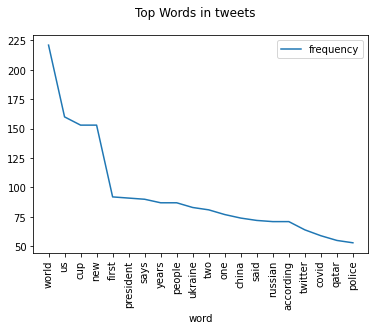

In [ ]:
# Frequency Distribution Plot
# look at first X words

# len(x) just the number of rows

x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in tweets')
plt.show()

###Word Cloud

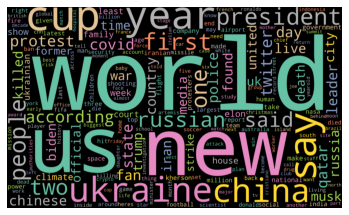

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df['tweet_case_change']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(width = 5000, height = 3000, random_state=1, 
background_color='black', colormap='Set2', collocations=False).generate(' '.join(df['tweet_case_change']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df['tweet_case_change'] = df.apply(lambda row: nltk.word_tokenize(row['tweet_case_change']), axis=1)
df.head()

,id,date,tweet,BBC,tweet_case_change
0,1597646721185611777,2022-11-29 17:40:35+00:00,"""I was going through something that night... I...",1.0,"[going, something, night, lost, itwill, smith,..."
1,1598090530201735168,2022-11-30 23:04:08+00:00,US President Joe Biden plans to meet Prince Wi...,1.0,"[us, president, joe, biden, plans, meet, princ..."
2,1593524940032167936,2022-11-18 08:42:06+00:00,Anger in China at reports baby died due to Cov...,1.0,"[anger, china, reports, baby, died, due, covid..."
3,1595142594832613383,2022-11-22 19:50:05+00:00,Police unprepared for Tanzania plane crash res...,1.0,"[police, unprepared, tanzania, plane, crash, r..."
4,1597213747059228672,2022-11-28 13:00:06+00:00,Delete photos or face arrest at Shanghai Covid...,1.0,"[delete, photos, face, arrest, shanghai, covid..."


In [ ]:
# here's what we did
print(df['tweet_case_change'][0])
print(df['tweet_case_change'][1])
print(df['tweet_case_change'][2])

['going', 'something', 'night', 'lost', 'itwill', 'smith', 'says', 'bottled', 'rage', 'led', 'slap', 'chris', 'rock', 'oscars', 'httpstcodpwcitlhsh']
['us', 'president', 'joe', 'biden', 'plans', 'meet', 'prince', 'william', 'catherine', 'boston', 'httpstcoyccullsnlg']
['anger', 'china', 'reports', 'baby', 'died', 'due', 'covid', 'delays', 'httpstcopdqophhhgw']


###Lexicon Normalization- Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# this is the function we will use
ps = PorterStemmer()

filtered_sent = df['tweet_case_change'][1]

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['us', 'president', 'joe', 'biden', 'plans', 'meet', 'prince', 'william', 'catherine', 'boston', 'httpstcoyccullsnlg']
Stemmed Sentence: ['us', 'presid', 'joe', 'biden', 'plan', 'meet', 'princ', 'william', 'catherin', 'boston', 'httpstcoyccullsnlg']


In [ ]:
df['Stemmed'] = df['tweet_case_change'].apply(lambda x: [ps.stem(y) for y in x])

In [ ]:
df['Stemmed'].head()

0    [go, someth, night, lost, itwil, smith, say, b...
1    [us, presid, joe, biden, plan, meet, princ, wi...
2    [anger, china, report, babi, die, due, covid, ...
3    [polic, unprepar, tanzania, plane, crash, resc...
4    [delet, photo, face, arrest, shanghai, covid, ...
Name: Stemmed, dtype: object

In [ ]:
# check your work!
print(df['tweet_case_change'][0]) # reported
print(df['Stemmed'][0]) # report

print(df['tweet_case_change'][10]) # note the difference between inches, reported, covered
print(df['Stemmed'][10]) # inch, report, cover

['going', 'something', 'night', 'lost', 'itwill', 'smith', 'says', 'bottled', 'rage', 'led', 'slap', 'chris', 'rock', 'oscars', 'httpstcodpwcitlhsh']
['go', 'someth', 'night', 'lost', 'itwil', 'smith', 'say', 'bottl', 'rage', 'led', 'slap', 'chri', 'rock', 'oscar', 'httpstcodpwcitlhsh']
['chinas', 'government', 'listen', 'covid', 'protesters', 'httpstcovggxfxk']
['china', 'govern', 'listen', 'covid', 'protest', 'httpstcovggxfxk']


###Sentiment Intensity Score

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
df.head(10)

,id,date,tweet,BBC,tweet_case_change,Stemmed
0,1597646721185611777,2022-11-29 17:40:35+00:00,"""I was going through something that night... I...",1.0,"[going, something, night, lost, itwill, smith,...","[go, someth, night, lost, itwil, smith, say, b..."
1,1598090530201735168,2022-11-30 23:04:08+00:00,US President Joe Biden plans to meet Prince Wi...,1.0,"[us, president, joe, biden, plans, meet, princ...","[us, presid, joe, biden, plan, meet, princ, wi..."
2,1593524940032167936,2022-11-18 08:42:06+00:00,Anger in China at reports baby died due to Cov...,1.0,"[anger, china, reports, baby, died, due, covid...","[anger, china, report, babi, die, due, covid, ..."
3,1595142594832613383,2022-11-22 19:50:05+00:00,Police unprepared for Tanzania plane crash res...,1.0,"[police, unprepared, tanzania, plane, crash, r...","[polic, unprepar, tanzania, plane, crash, resc..."
4,1597213747059228672,2022-11-28 13:00:06+00:00,Delete photos or face arrest at Shanghai Covid...,1.0,"[delete, photos, face, arrest, shanghai, covid...","[delet, photo, face, arrest, shanghai, covid, ..."
5,1594565705680273408,2022-11-21 05:37:44+00:00,Ukraine war: Hope returns to Kherson after Rus...,1.0,"[ukraine, war, hope, returns, kherson, russian...","[ukrain, war, hope, return, kherson, russian, ..."
6,1597274140926529539,2022-11-28 17:00:05+00:00,World's largest active volcano erupts in Hawai...,1.0,"[worlds, largest, active, volcano, erupts, haw...","[world, largest, activ, volcano, erupt, hawaii..."
7,1594653550096916480,2022-11-21 11:26:48+00:00,Twitter boss Elon Musk keeps conspiracy theori...,1.0,"[twitter, boss, elon, musk, keeps, conspiracy,...","[twitter, boss, elon, musk, keep, conspiraci, ..."
8,1593215899225714688,2022-11-17 12:14:05+00:00,Donald Trump has officially announced his inte...,1.0,"[donald, trump, officially, announced, intenti...","[donald, trump, offici, announc, intent, run, ..."
9,1593235028493975552,2022-11-17 13:30:06+00:00,"Celtic ruler's ring goes under hammer for £36,...",1.0,"[celtic, rulers, ring, goes, hammer, auction, ...","[celtic, ruler, ring, goe, hammer, auction, ht..."


In [ ]:
#Test for one tweet
sid = SentimentIntensityAnalyzer()
sentence='Germany was knocked out of the 2022 World Cup on Thursday after a quite extraordinary finale to Group E, despite beating Costa Rica'
score = sid.polarity_scores(sentence)
score

{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.357}

In [ ]:
print(score['neg'])
print(score['neu'])
print(score['pos'])
print(score['compound'])

0.0
0.894
0.106
0.357


In [ ]:
compound=[]
neg=[]
neu=[]
pos=[]

for sentence in df['tweet']:
  sid = SentimentIntensityAnalyzer()
  #print(sentence)
  score = sid.polarity_scores(sentence)
  compound.append(score['compound'])
  neg.append(score['neg'])
  neu.append(score['neu'])
  pos.append(score['pos'])

df['neg']=neg
df['neu']=neu
df['pos']=pos
df['compound']=compound

In [ ]:
df.head(10)

,id,date,tweet,BBC,tweet_case_change,Stemmed,neg,neu,pos,compound
0,1597646721185611777,2022-11-29 17:40:35+00:00,"""I was going through something that night... I...",1.0,"[going, something, night, lost, itwill, smith,...","[go, someth, night, lost, itwil, smith, say, b...",0.200,0.746,0.054,-0.6486
1,1598090530201735168,2022-11-30 23:04:08+00:00,US President Joe Biden plans to meet Prince Wi...,1.0,"[us, president, joe, biden, plans, meet, princ...","[us, presid, joe, biden, plan, meet, princ, wi...",0.000,1.000,0.000,0.0000
2,1593524940032167936,2022-11-18 08:42:06+00:00,Anger in China at reports baby died due to Cov...,1.0,"[anger, china, reports, baby, died, due, covid...","[anger, china, report, babi, die, due, covid, ...",0.422,0.578,0.000,-0.8074
3,1595142594832613383,2022-11-22 19:50:05+00:00,Police unprepared for Tanzania plane crash res...,1.0,"[police, unprepared, tanzania, plane, crash, r...","[polic, unprepar, tanzania, plane, crash, resc...",0.180,0.600,0.220,0.1531
4,1597213747059228672,2022-11-28 13:00:06+00:00,Delete photos or face arrest at Shanghai Covid...,1.0,"[delete, photos, face, arrest, shanghai, covid...","[delet, photo, face, arrest, shanghai, covid, ...",0.268,0.732,0.000,-0.5267
5,1594565705680273408,2022-11-21 05:37:44+00:00,Ukraine war: Hope returns to Kherson after Rus...,1.0,"[ukraine, war, hope, returns, kherson, russian...","[ukrain, war, hope, return, kherson, russian, ...",0.319,0.500,0.181,-0.2960
6,1597274140926529539,2022-11-28 17:00:05+00:00,World's largest active volcano erupts in Hawai...,1.0,"[worlds, largest, active, volcano, erupts, haw...","[world, largest, activ, volcano, erupt, hawaii...",0.000,0.722,0.278,0.4019
7,1594653550096916480,2022-11-21 11:26:48+00:00,Twitter boss Elon Musk keeps conspiracy theori...,1.0,"[twitter, boss, elon, musk, keeps, conspiracy,...","[twitter, boss, elon, musk, keep, conspiraci, ...",0.236,0.764,0.000,-0.5267
8,1593215899225714688,2022-11-17 12:14:05+00:00,Donald Trump has officially announced his inte...,1.0,"[donald, trump, officially, announced, intenti...","[donald, trump, offici, announc, intent, run, ...",0.000,1.000,0.000,0.0000
9,1593235028493975552,2022-11-17 13:30:06+00:00,"Celtic ruler's ring goes under hammer for £36,...",1.0,"[celtic, rulers, ring, goes, hammer, auction, ...","[celtic, ruler, ring, goe, hammer, auction, ht...",0.000,1.000,0.000,0.0000


In [ ]:
df[['id','date','tweet','neg','neu','pos','compound']].to_csv('df.csv')

###Score Distribution

In [ ]:
a=df['neg'].describe()

In [ ]:
import seaborn as sns
def summary(df,score):
  print("Summary of",score)
  s=df[score].describe()
  print("Mean",s[1])
  print("Maximum ",s[-1])
  print("75th pctile",s[-2])
  print("Median",s[-3])
  print("25th pctile",s[-4])
  print("Minimum ",s[-5])
  print("\nHistogram for score",score.upper())
  sns.histplot(data=df,x=score,kde=True)

Summary of pos
Mean 0.06963936063936065
Maximum  0.655
75th pctile 0.128
Median 0.0
25th pctile 0.0
Minimum  0.0

Histogram for score POS


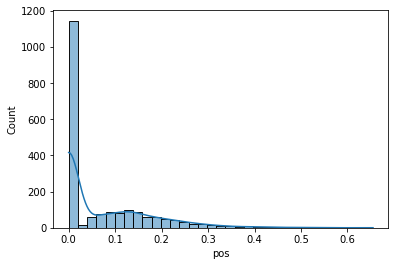

In [ ]:
summary(df,'pos')

Summary of neg
Mean 0.1038971028971029
Maximum  0.703
75th pctile 0.1905
Median 0.0
25th pctile 0.0
Minimum  0.0

Histogram for score NEG


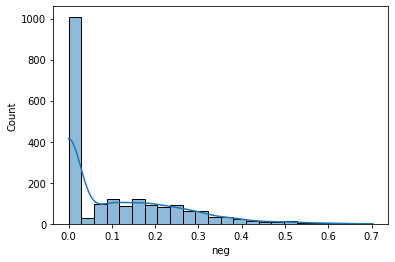

In [ ]:
summary(df,'neg')

Summary of neu
Mean 0.826465034965035
Maximum  1.0
75th pctile 1.0
Median 0.8365
25th pctile 0.725
Minimum  0.297

Histogram for score NEU


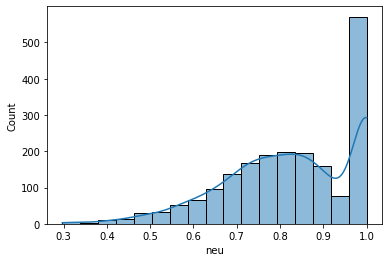

In [ ]:
summary(df,'neu')

Summary of compound
Mean -0.07393576423576424
Maximum  0.9661
75th pctile 0.1531
Median 0.0
25th pctile -0.4019
Minimum  -0.9601

Histogram for score COMPOUND


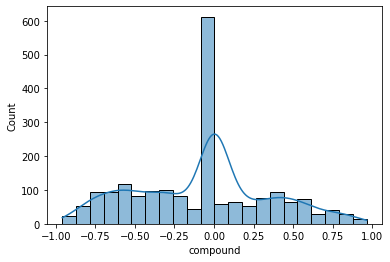

In [ ]:
summary(df,'compound')

#Part II: Modeling

##Data enrichment before modeling 
Remove special characters, urls and numbers as they will be insignifiant in identifying the emotions.

In [ ]:
import re
# remove url links
df.tweet = df.tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

In [ ]:
# remove url/website that didn't use http, is only checking for .com websites 
# so words that are seperated by a . are not removed
df.tweet = df.tweet.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))



In [ ]:
# remove {link}
df.tweet = df.tweet.apply(lambda x: re.sub(r'{link}', '', x))


In [ ]:
# remove &text; html chars
df.tweet = df.tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))


In [ ]:
# remove all remaining characters that aren't letters, white space, or 
# the following #:)(/\='] that are used in emojis or hashtags
df.tweet = df.tweet.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))


In [ ]:
# [video]
df.tweet = df.tweet.apply(lambda x: re.sub(r"\[video\]", '', x))


##Model 1: CountVectorizer() and TF-IDF with Dense Neural Networks

###CountVectorizer: Pre processing

In [ ]:
  from sklearn.feature_extraction.text import CountVectorizer
  from nltk.tokenize import RegexpTokenizer

  from sklearn.model_selection import train_test_split

  from sklearn.ensemble import RandomForestRegressor
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_absolute_error

  import matplotlib.pyplot as plt

In [ ]:
X=pd.DataFrame(df['tweet'])
y=df[['compound','neg','pos','neu']]


In [ ]:
X.shape

(2002, 1)

In [ ]:
X.head()

,tweet
0,was going through something that night just ...
1,resident oe iden plans to meet rince illiam a...
2,nger in hina at reports baby died due to ovid ...
3,olice unprepared for anzania plane crash rescu...
4,elete photos or face arrest at hanghai ovid pr...


In [ ]:
y.shape

(2002, 4)

In [ ]:
y.head()

,compound,neg,pos,neu
0,-0.6486,0.200,0.054,0.746
1,0.0000,0.000,0.000,1.000
2,-0.8074,0.422,0.000,0.578
3,0.1531,0.180,0.220,0.600
4,-0.5267,0.268,0.000,0.732


In [ ]:
# get rid of garbage text
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

#tokenizer to remove unwanted elements from out data like symbols and numbers
# IN ONE LINE OF CODE! Let's go for the more detailed description...
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1), # (1,1) is unigram, (1,2) is uni and bigram, (2,2) is just bigram
                     tokenizer = token.tokenize)
text_counts= cv.fit_transform(X['tweet']) # don't forget to update this name, based on what you use!
print(text_counts.shape)

(2002, 6452)


In [ ]:
# inspect text_counts
# check out the first row
print(text_counts)
np.sum(text_counts[1]) 

  (0, 2483)	1
  (0, 3800)	1
  (0, 3193)	1
  (0, 3450)	1
  (0, 2895)	1
  (0, 3646)	1
  (0, 5108)	1
  (0, 785)	1
  (0, 4618)	1
  (0, 3316)	1
  (0, 5314)	1
  (0, 2789)	1
  (0, 3891)	1
  (0, 5115)	1
  (1, 4870)	1
  (1, 3902)	1
  (1, 2846)	1
  (1, 4335)	1
  (1, 3562)	1
  (1, 4961)	1
  (1, 2899)	1
  (1, 509)	1
  (1, 4140)	1
  (2, 3792)	1
  (2, 2714)	1
  :	:
  (1999, 3808)	1
  (1999, 5682)	1
  (1999, 5453)	1
  (1999, 3224)	1
  (1999, 77)	1
  (1999, 1437)	1
  (2000, 4103)	1
  (2000, 158)	1
  (2000, 3793)	1
  (2000, 2188)	1
  (2000, 6366)	1
  (2000, 5024)	1
  (2000, 5556)	1
  (2000, 1436)	1
  (2000, 5183)	1
  (2000, 4947)	1
  (2000, 2947)	1
  (2000, 6329)	1
  (2000, 1797)	1
  (2001, 4703)	1
  (2001, 712)	1
  (2001, 1622)	1
  (2001, 2390)	1
  (2001, 5012)	1
  (2001, 3513)	1


9

In [ ]:
  # Feature names in CV
  feature_names=pd.DataFrame(cv.get_feature_names_out())


In [ ]:
  ## Change the type of text counts to numpy array as this will be used as input for FNN
  text_counts=text_counts.toarray()
  print("\nData type of Text Counts is ",type(text_counts))


Data type of Text Counts is  <class 'numpy.ndarray'>


In [ ]:
  # 70% training 30% test
  # notice we we 
  X_train, X_test, y_train, y_test = train_test_split(text_counts, y, test_size=0.3)



In [ ]:
  print("\nshape of variables after Train Test split")
  print("shape of text counts",text_counts.shape)
  print("shape of X_train and Y_train",X_train.shape,y_train.shape)
  print("shape of X_test and Y_test",X_test.shape,y_test.shape)


shape of variables after Train Test split
shape of text counts (2002, 6452)
shape of X_train and Y_train (1401, 6452) (1401, 4)
shape of X_test and Y_test (601, 6452) (601, 4)


###CountVectorizer: Modeling

In [ ]:

  ## import the packages
  from keras.models import Sequential
  from keras.layers import Dense, Dropout
  from keras.callbacks import EarlyStopping

  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(4, activation='linear'))
  model.summary()


  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])


  # early stopping callback
  es = EarlyStopping(monitor='val_loss',
                    mode='min',
                    patience=10, # you can choose a big value!
                    restore_best_weights = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               645300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 4)                 104       
                                                                 
Total params: 651,729
Trainable params: 651,729
Non-trai

In [ ]:
  history = model.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      callbacks=[es], # early stopping callbacks
                      epochs=200, # set this to a big number
                      batch_size=10, # this is a hyperparameter
                      shuffle=True, # it's a best practice to shuffle your data
                      verbose=1) # this prints the output as the model trains

Epoch 1/200
141/141 [==============================] - 3s 13ms/step - loss: 0.0794 - mae: 0.1999 - val_loss: 0.0576 - val_mae: 0.1622
Epoch 2/200
141/141 [==============================] - 2s 12ms/step - loss: 0.0572 - mae: 0.1659 - val_loss: 0.0498 - val_mae: 0.1533
Epoch 3/200
141/141 [==============================] - 2s 12ms/step - loss: 0.0447 - mae: 0.1471 - val_loss: 0.0429 - val_mae: 0.1401
Epoch 4/200
141/141 [==============================] - 2s 12ms/step - loss: 0.0359 - mae: 0.1327 - val_loss: 0.0406 - val_mae: 0.1357
Epoch 5/200
141/141 [==============================] - 2s 12ms/step - loss: 0.0299 - mae: 0.1220 - val_loss: 0.0367 - val_mae: 0.1294
Epoch 6/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0270 - mae: 0.1160 - val_loss: 0.0374 - val_mae: 0.1300
Epoch 7/200
141/141 [==============================] - 2s 12ms/step - loss: 0.0220 - mae: 0.1059 - val_loss: 0.0350 - val_mae: 0.1230
Epoch 8/200
141/141 [==============================] - 2s 12ms

In [ ]:
print(y)

      compound    neg    pos    neu
0      -0.6486  0.200  0.054  0.746
1       0.0000  0.000  0.000  1.000
2      -0.8074  0.422  0.000  0.578
3       0.1531  0.180  0.220  0.600
4      -0.5267  0.268  0.000  0.732
...        ...    ...    ...    ...
1997   -0.7906  0.258  0.000  0.742
1998    0.1280  0.000  0.049  0.951
1999    0.1280  0.100  0.121  0.779
2000    0.2732  0.080  0.115  0.805
2001    0.8255  0.000  0.523  0.477

[2002 rows x 4 columns]


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   compound  2002 non-null   float64
 1   neg       2002 non-null   float64
 2   pos       2002 non-null   float64
 3   neu       2002 non-null   float64
dtypes: float64(4)
memory usage: 62.7 KB


###CountVectorizer: Evaluation, Scatterplot & Metrics

###Evaluation

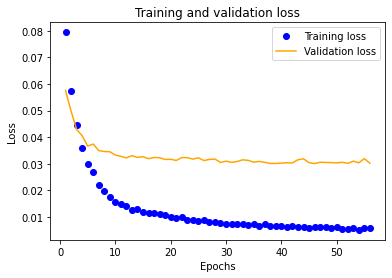

In [ ]:

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




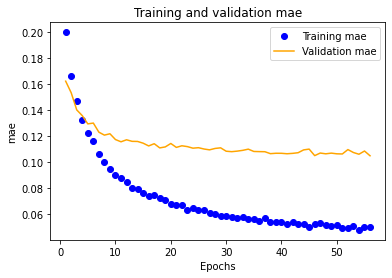

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

###Scatter Plot

In [ ]:
y=df[['compound','neg','pos','neu']]

In [ ]:
y['compound']

0      -0.6486
1       0.0000
2      -0.8074
3       0.1531
4      -0.5267
         ...  
1997   -0.7906
1998    0.1280
1999    0.1280
2000    0.2732
2001    0.8255
Name: compound, Length: 2002, dtype: float64

In [ ]:
preds=model.predict(X_train)

44/44 [==============================] - 0s 5ms/step


In [ ]:
preds_train=model.predict(X_train)
preds_test=model.predict(X_test)

19/19 [==============================] - 0s 6ms/step


Compound

In [ ]:
  print("\nScatter Plot to compare actual vs predicted\n")

  def drawscatterplot(x1,y1,x2,y2):
    # scatterplot of actual vs. pred
    # specify the dimensions 
    fig, axes = plt.subplots(1,2) # 1 row, 2 columns

    # this makes the individual subplots
    # Training Results
    axes[0].scatter(x=x1, y=y1) #first row, first entry (left top)
    axes[0].set_xlabel("Actual", fontsize=10)
    axes[0].set_ylabel("Predicted",  fontsize=10)
    axes[0].set_title("Training")
    # add 45 deg line
    x = np.linspace(*axes[0].get_xlim())
    axes[0].plot(x, x, color='red')
    # Test Results
    axes[1].scatter(x=x2, y=y2) # first row, second entry (right top)
    axes[1].set_xlabel("Actual", fontsize=10)
    axes[1].set_ylabel("Predicted",  fontsize=10)
    axes[1].set_title("Test")
    # add 45 deg line
    x = np.linspace(*axes[1].get_xlim())
    axes[1].plot(x, x, color='red')

    # tight layout
    fig.tight_layout()

    # show the plot
    plt.show()


Scatter Plot to compare actual vs predicted



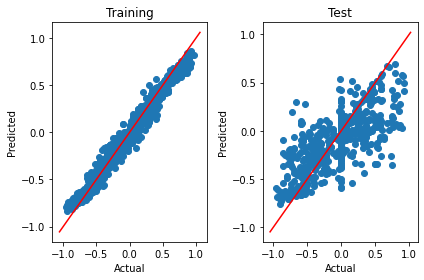

In [ ]:
  x1= y_train['compound']
  y1= preds_train[:,0]
  x2= y_test['compound']
  y2= preds_test[:,0]
  drawscatterplot(x1,y1,x2,y2)

### Negative

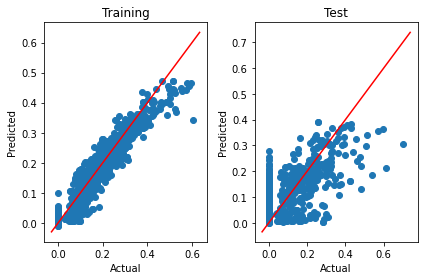

In [ ]:
  x1= y_train['neg']
  y1= preds_train[:,1]
  x2= y_test['neg']
  y2= preds_test[:,1]
  drawscatterplot(x1,y1,x2,y2)


### Positive

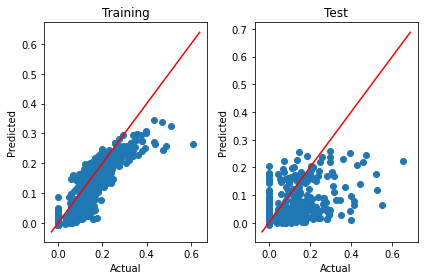

In [ ]:
  x1= y_train['pos']
  y1= preds_train[:,2]
  x2= y_test['pos']
  y2= preds_test[:,2]
  drawscatterplot(x1,y1,x2,y2)

### Neutral

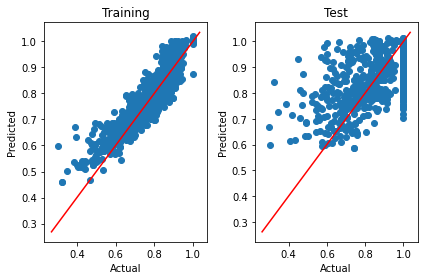

In [ ]:
  x1= y_train['neu']
  y1= preds_train[:,3]
  x2= y_test['neu']
  y2= preds_test[:,3]
  drawscatterplot(x1,y1,x2,y2)

###Metrics

#### compound

In [ ]:
print("\nEvaluation Metrics\n")
def printmatrics(a1,b1,a2,b2):

  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error



  print("\nMean Absolute Error")
  print("Train Data is {:0.3f}".format(mean_absolute_error(a1,b1))) # train
  print("Test Data  is {:0.3f}".format(mean_absolute_error(a2,b2))) # test

  print("\nR-squared")
  print("Train Data is {:0.3f}".format(r2_score(a1,b1))) # train
  print("Test Data  is {:0.3f}".format(r2_score(a2,b2))) # test

  print("\nMean sqaured value")
  print("Train Data : {:0.3f}".format(mean_squared_error(a1,b1))) # train
  print("Test Data  : {:0.3f}".format(mean_squared_error(a2,b2))) # test


Evaluation Metrics



In [ ]:
a1= y_train['compound']
b1= preds_train[:,0]
a2= y_test['compound']
b2= preds_test[:,0]
printmatrics(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.045
Test Data  is 0.208

R-squared
Train Data is 0.976
Test Data  is 0.511

Mean sqaured value
Train Data : 0.004
Test Data  : 0.087


#### Negative

In [ ]:
a1= y_train['neg']
b1= preds_train[:,1]
a2= y_test['neg']
b2= preds_test[:,1]
printmatrics(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.024
Test Data  is 0.062

R-squared
Train Data is 0.935
Test Data  is 0.511

Mean sqaured value
Train Data : 0.001
Test Data  : 0.008


#### Positive

In [ ]:
a1= y_train['pos']
b1= preds_train[:,2]
a2= y_test['pos']
b2= preds_test[:,2]
printmatrics(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.024
Test Data  is 0.059

R-squared
Train Data is 0.849
Test Data  is 0.244

Mean sqaured value
Train Data : 0.001
Test Data  : 0.008


#### Neutral

In [ ]:
a1= y_train['neu']
b1= preds_train[:,3]
a2= y_test['neu']
b2= preds_test[:,3]
printmatrics(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.030
Test Data  is 0.091

R-squared
Train Data is 0.913
Test Data  is 0.311

Mean sqaured value
Train Data : 0.002
Test Data  : 0.016


###TF-IDF: Modeling

In [ ]:
 #Import necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [ ]:
  # Part 1 - Prepare X and y columns for modeling

  X=pd.DataFrame(df['tweet'])
  y=df[['compound','neg','pos','neu']]
  print(X.shape,y.shape)



(2002, 1) (2002, 4)


In [ ]:
  # Part 2 Create the matrix
  
  tf=TfidfVectorizer()
  text_tf= tf.fit_transform(X['tweet'])
    ## check out what you did
  print("Number of TF-IDFs", text_tf.shape) 
  print("Number of words", text_tf[0])


Number of TF-IDFs (2002, 6661)
Number of words   (0, 5256)	0.2596767150374357
  (0, 5901)	0.0704798516026944
  (0, 520)	0.11440764644405406
  (0, 4014)	0.2529063860533774
  (0, 2884)	0.22144282593912823
  (0, 5466)	0.2529063860533774
  (0, 5976)	0.07307109926164747
  (0, 2803)	0.21423303618571798
  (0, 3421)	0.23039813814594368
  (0, 4758)	0.27864571457428716
  (0, 826)	0.27864571457428716
  (0, 5249)	0.15234564551775695
  (0, 3756)	0.2422235995109424
  (0, 2992)	0.22419475149661539
  (0, 3234)	0.14994907196973836
  (0, 3556)	0.22419475149661539
  (0, 3297)	0.1806469554397437
  (0, 3919)	0.21010278327213594
  (0, 5900)	0.13051877455522387
  (0, 5517)	0.23784984407490267
  (0, 5947)	0.22419475149661539
  (0, 2565)	0.2271670575324677
  (0, 6459)	0.14422484037639896


In [ ]:
## Change the type of text counts to numpy array as this will be used as input for FNN
text_tf=text_tf.toarray()
print("\nData type of TD IDF is ",type(text_tf))


Data type of TD IDF is  <class 'numpy.ndarray'>


In [ ]:
  # 70% training 30% test

  X_train, X_test, y_train, y_test = train_test_split(text_tf, y, test_size=0.3)

  print("\nShape of variables after Train Test split")
  print("Shape of Text counts",text_tf.shape)
  print("Shape of X_train and Y_train",X_train.shape,y_train.shape)
  print("Shape of X_test and Y_test",X_test.shape,y_test.shape)


Shape of variables after Train Test split
Shape of Text counts (2002, 6661)
Shape of X_train and Y_train (1401, 6661) (1401, 4)
Shape of X_test and Y_test (601, 6661) (601, 4)


In [ ]:
  from keras.models import Sequential
  from keras.layers import Dense, Dropout
  from keras.callbacks import EarlyStopping

  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(4, activation='linear'))
  model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               666200    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 4)                 104       
                                                                 
Total params: 672,629
Trainable params: 672,629
Non-tr

In [ ]:
 model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])

In [ ]:
 # early stopping callback
es = EarlyStopping(monitor='val_loss',
                    mode='min',
                    patience=10, # you can choose a big value!
                    restore_best_weights = True)

In [ ]:
  history = model.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      callbacks=[es], # early stopping callbacks
                      epochs=200, # set this to a big number
                      batch_size=10, # this is a hyperparameter
                      shuffle=True, # it's a best practice to shuffle your data
                      verbose=1)

Epoch 1/200
141/141 [==============================] - 3s 14ms/step - loss: 0.0752 - mae: 0.1923 - val_loss: 0.0545 - val_mae: 0.1569
Epoch 2/200
141/141 [==============================] - 2s 14ms/step - loss: 0.0545 - mae: 0.1599 - val_loss: 0.0478 - val_mae: 0.1466
Epoch 3/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0427 - mae: 0.1432 - val_loss: 0.0420 - val_mae: 0.1425
Epoch 4/200
141/141 [==============================] - 2s 13ms/step - loss: 0.0327 - mae: 0.1254 - val_loss: 0.0374 - val_mae: 0.1311
Epoch 5/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0256 - mae: 0.1120 - val_loss: 0.0333 - val_mae: 0.1245
Epoch 6/200
141/141 [==============================] - 2s 12ms/step - loss: 0.0215 - mae: 0.1035 - val_loss: 0.0325 - val_mae: 0.1213
Epoch 7/200
141/141 [==============================] - 2s 11ms/step - loss: 0.0189 - mae: 0.0976 - val_loss: 0.0317 - val_mae: 0.1158
Epoch 8/200
141/141 [==============================] - 2s 11ms

###TF-IDF:Evaluation, Scatterplot & Metrics

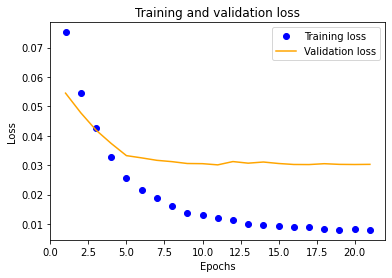

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

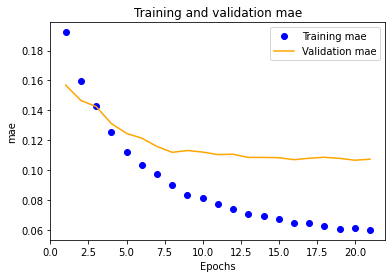

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [ ]:
y=df[['compound','neg','pos','neu']]

In [ ]:
preds=model.predict(X_train)

44/44 [==============================] - 0s 4ms/step


In [ ]:
preds_train=model.predict(X_train)
preds_test=model.predict(X_test)

19/19 [==============================] - 0s 5ms/step


In [ ]:
preds_train.shape

(1401, 4)

In [ ]:
preds_test.shape

(601, 4)

#### compound

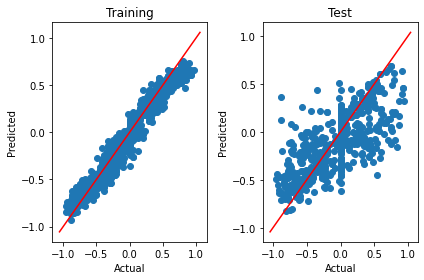

In [ ]:
  x1= y_train['compound']
  y1= preds_train[:,0]
  x2= y_test['compound']
  y2= preds_test[:,0]
  drawscatterplot(x1,y1,x2,y2)

#### negative

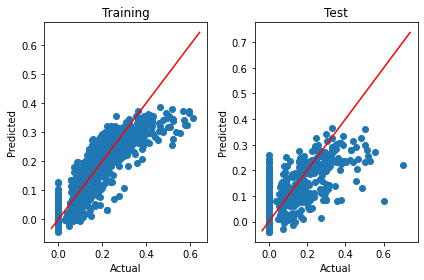

In [ ]:
  x1= y_train['neg']
  y1= preds_train[:,1]
  x2= y_test['neg']
  y2= preds_test[:,1]
  drawscatterplot(x1,y1,x2,y2)

#### positive

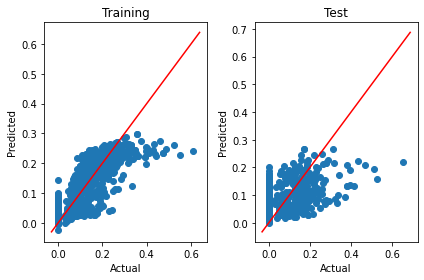

In [ ]:
  x1= y_train['pos']
  y1= preds_train[:,2]
  x2= y_test['pos']
  y2= preds_test[:,2]
  drawscatterplot(x1,y1,x2,y2)

#### neutral

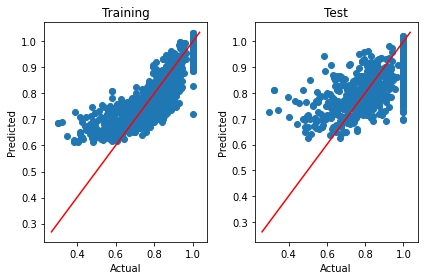

In [ ]:
  x1= y_train['neu']
  y1= preds_train[:,3]
  x2= y_test['neu']
  y2= preds_test[:,3]
  drawscatterplot(x1,y1,x2,y2)

### Evaluation Metrics

#### compound

In [ ]:
a1= y_train['compound']
b1= preds_train[:,0]
a2= y_test['compound']
b2= preds_test[:,0]
printmatrics(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.069
Test Data  is 0.216

R-squared
Train Data is 0.952
Test Data  is 0.493

Mean sqaured value
Train Data : 0.009
Test Data  : 0.090


#### negative

In [ ]:
a1= y_train['neg']
b1= preds_train[:,1]
a2= y_test['neg']
b2= preds_test[:,1]
printmatrics(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.036
Test Data  is 0.067

R-squared
Train Data is 0.845
Test Data  is 0.494

Mean sqaured value
Train Data : 0.003
Test Data  : 0.009


#### positive

In [ ]:
a1= y_train['pos']
b1= preds_train[:,2]
a2= y_test['pos']
b2= preds_test[:,2]
printmatrics(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.039
Test Data  is 0.066

R-squared
Train Data is 0.741
Test Data  is 0.275

Mean sqaured value
Train Data : 0.003
Test Data  : 0.007


#### neutral

In [ ]:
a1= y_train['neu']
b1= preds_train[:,3]
a2= y_test['neu']
b2= preds_test[:,3]
printmatrics(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.051
Test Data  is 0.092

R-squared
Train Data is 0.772
Test Data  is 0.352

Mean sqaured value
Train Data : 0.005
Test Data  : 0.015


##Model 2: Flattened word embeddings into a Dense Neural Network (pre-trained)

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [ ]:
import os # Download and unzip glove word embeddings from opensource, This may take more time based on download speeds
!pip install wget
import wget # Using wget library to download 
wget.download('https://nlp.stanford.edu/data/glove.6B.zip') # Download the zip file
os.mkdir('/content/glove_unzip')
from zipfile import ZipFile
ZipFile("/content/glove.6B.zip").extractall("/content/glove_unzip") # Ectract files
embeddings_index = {}
f = open('/content/glove_unzip/glove.6B.100d.txt') # File path 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs # Add coefficients to the dictionary as word index pair
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c9fdc02068920cae6527491842a8eeacae78c24580e488efadafc28108712d37
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Found 400000 word vectors.


In [ ]:

from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 200 words
training_samples = 1500  # We will be training on X samples
validation_samples = 502  # We will be validating on X samples
max_features = 5000  # We will only consider the top 10,000 words in the dataset

# we will use training_samples and validation_samples
# later on in a few cells... for splitting data...

In [ ]:
X=list(df['tweet'])
y=df[['neg','pos','neu','compound']]

In [ ]:
# link: https://keras.io/preprocessing/text/
# has good details on what a tokenizer does

# This class allows to vectorize a text corpus, by turning each text into either a sequence of integers
# omits common characters 
tokenizer = Tokenizer(num_words=max_features)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(X)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 6896 unique tokens.
Shape of data tensor: (2002, 100)
Shape of label tensor: (2002, 4)


In [ ]:
x_train = data[:training_samples] # from 0 to (1400) training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
embedding_dim = 100 # this is the dimension of the file we imported
# could use 50, but need to make sure you download that file!

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_features:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
     

## Model

In [ ]:

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='linear'))
model.summary()

# in this model, the embeddings are turned on their sides 
# when they get flattened, so our 100 words with
# 100 dimensions turns into 10000 features for modeling

# if you adjust the values for embedding_dim (make it 20?) 
# and max_words (make it 30?),
# this may help you better understand things...

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          500000    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                320032    
                                                                 
 dense_9 (Dense)             (None, 4)                 132       
                                                                 
Total params: 820,164
Trainable params: 820,164
Non-trainable params: 0
_________________________________________________________________


### Load the GloVe embeddings in the model

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

### Train and Evaluation

In [ ]:
from keras.callbacks import EarlyStopping
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

es = EarlyStopping(monitor='val_loss',
                  mode='min',
                  patience=15, # you can choose a big value!
                  restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

history = model.fit(x_train, y_train,
                    callbacks=[es],
                    epochs=500,
                    batch_size=5,
                    validation_data = (x_val, y_val))
# saves on left hand side!
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/500
300/300 [==============================] - 3s 9ms/step - loss: 0.0735 - mae: 0.1921 - val_loss: 0.0609 - val_mae: 0.1644
Epoch 2/500
300/300 [==============================] - 2s 8ms/step - loss: 0.0421 - mae: 0.1466 - val_loss: 0.0728 - val_mae: 0.1789
Epoch 3/500
300/300 [==============================] - 2s 8ms/step - loss: 0.0336 - mae: 0.1295 - val_loss: 0.0763 - val_mae: 0.1782
Epoch 4/500
300/300 [==============================] - 2s 8ms/step - loss: 0.0275 - mae: 0.1157 - val_loss: 0.0652 - val_mae: 0.1659
Epoch 5/500
300/300 [==============================] - 2s 7ms/step - loss: 0.0227 - mae: 0.1050 - val_loss: 0.0694 - val_mae: 0.1680
Epoch 6/500
300/300 [==============================] - 2s 7ms/step - loss: 0.0195 - mae: 0.0968 - val_loss: 0.0527 - val_mae: 0.1454
Epoch 7/500
300/300 [==============================] - 2s 8ms/step - loss: 0.0160 - mae: 0.0880 - val_loss: 0.0588 - val_mae: 0.1565
Epoch 8/500
300/300 [==============================] - 2s 8ms/step - 


Loss curves for Test and Train Data based on model



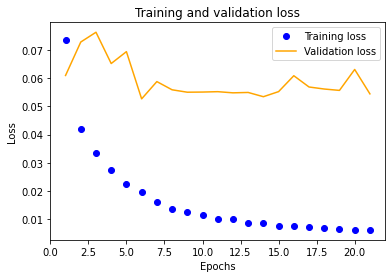

In [ ]:
print("\nLoss curves for Test and Train Data based on model\n")

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

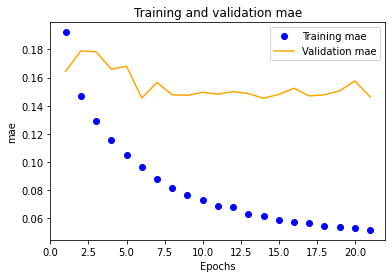

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

### Scatter plots

In [ ]:

pred_train=model.predict(x_train)
pred_val=model.predict(x_val)

16/16 [==============================] - 0s 3ms/step


#### compound

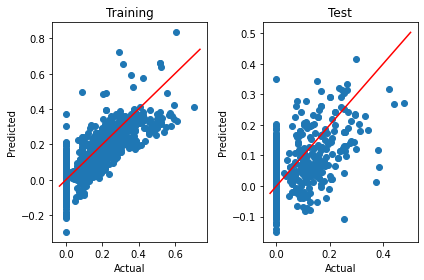

In [ ]:
x1=y_train[:,0:1]
y1=pred_train[:,0:1]
x2=y_val[:,0:1]
y2=pred_val[:,0:1]
drawscatterplot(x1,y1,x2,y2)

#### negative

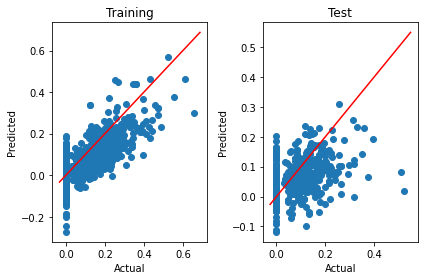

In [ ]:
x1=y_train[:,1:2]
y1=pred_train[:,1:2]
x2=y_val[:,1:2]
y2=pred_val[:,1:2]
drawscatterplot(x1,y1,x2,y2)

#### positive

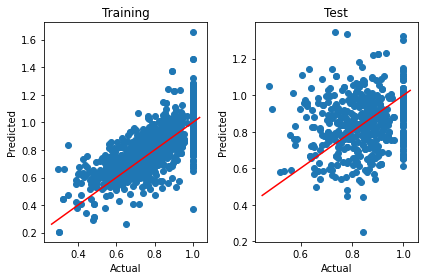

In [ ]:
x1=y_train[:,2:3]
y1=pred_train[:,2:3]
x2=y_val[:,2:3]
y2=pred_val[:,2:3]
drawscatterplot(x1,y1,x2,y2)

#### neutral

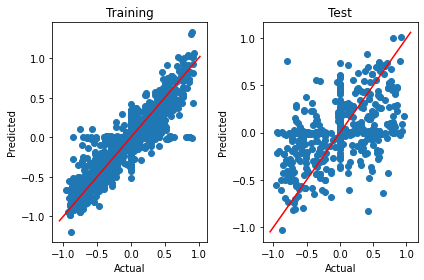

In [ ]:
x1=y_train[:,3:4]
y1=pred_train[:,3:4]
x2=y_val[:,3:4]
y2=pred_val[:,3:4]
drawscatterplot(x1,y1,x2,y2)

### metrics function definition

In [ ]:
print("\nEvaluation Metrics\n")
def printmatrics1(a1,b1,a2,b2):

  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error



  print("\nMean Absolute Error")
  print("Train Data is {:0.3f}".format(mean_absolute_error(a1,b1))) # train
  print("Test Data  is {:0.3f}".format(mean_absolute_error(a2,b2))) # test

  print("\nR-squared")
  print("Train Data is {:0.3f}".format(r2_score(a1,b1))) # train
  print("Test Data  is {:0.3f}".format(r2_score(a2,b2))) # test

  print("\nMean sqaured value")
  print("Train Data : {:0.3f}".format(mean_squared_error(a1,b1))) # train
  print("Test Data  : {:0.3f}".format(mean_squared_error(a2,b2))) # test


Evaluation Metrics



#### compound

In [ ]:
  a1=y_train[:,0:1]
  b1=pred_train[:,0:1]
  a2=y_val[:,0:1]
  b2=pred_val[:,0:1]
  printmatrics1(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.062
Test Data  is 0.072

R-squared
Train Data is 0.666
Test Data  is 0.022

Mean sqaured value
Train Data : 0.007
Test Data  : 0.008


#### negative

In [ ]:
a1=y_train[:,1:2]
b1=pred_train[:,1:2]
a2=y_val[:,1:2]
b2=pred_val[:,1:2]
printmatrics1(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.053
Test Data  is 0.065

R-squared
Train Data is 0.545
Test Data  is 0.008

Mean sqaured value
Train Data : 0.005
Test Data  : 0.008


#### positive

In [ ]:
a1=y_train[:,2:3]
b1=pred_train[:,2:3]
a2=y_val[:,2:3]
b2=pred_val[:,2:3]
printmatrics1(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.088
Test Data  is 0.133

R-squared
Train Data is 0.474
Test Data  is -1.243

Mean sqaured value
Train Data : 0.013
Test Data  : 0.029


#### neutral

In [ ]:
a1=y_train[:,3:4]
b1=pred_train[:,3:4]
a2=y_val[:,3:4]
b2=pred_val[:,3:4]
printmatrics1(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.126
Test Data  is 0.311

R-squared
Train Data is 0.811
Test Data  is 0.232

Mean sqaured value
Train Data : 0.031
Test Data  : 0.165


## Model 3: DL model with at least one recurrent layer and other things we learned from class.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 200  # We will cut tweets after 50 words
training_samples = 1500  # We will be training on X samples
validation_samples = 502  # We will be validating on X samples
max_features = 5000  # We will only consider the top 10,000 words in the dataset

# we will use training_samples and validation_samples
# later on in a few cells... for splitting data...

In [ ]:
texts= df['tweet']
sentiments= df[['compound','neg','pos','neu']]

In [ ]:
# link: https://keras.io/preprocessing/text/
# has good details on what a tokenizer does

# This class allows to vectorize a text corpus, by turning each text into either a sequence of integers
# omits common characters 
tokenizer = Tokenizer(num_words=max_features)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(texts)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
df_f = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
sentiments = np.asarray(sentiments)
print('Shape of data tensor:', df_f.shape)
print('Shape of label tensor:', sentiments.shape)

Found 6896 unique tokens.
Shape of data tensor: (2002, 200)
Shape of label tensor: (2002, 4)


In [ ]:
# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
indices = np.arange(df_f.shape[0])
np.random.shuffle(indices)
data = df_f[indices]
sentiments = sentiments[indices]

x_train = df_f[:training_samples] 
Y_train = sentiments[:training_samples]
x_test = df_f[training_samples: training_samples + validation_samples]
Y_test = sentiments[training_samples: training_samples + validation_samples]

### model

In [ ]:
x_train.shape

(1500, 200)

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, LSTM
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, GRU
from keras.callbacks import EarlyStopping
# define model

max_features = 5000  # number of words to consider as features
maxlen = 200 # cut texts after this number of words (among top max_features most common words)
batch_size = 50

model = Sequential()
model.add(Embedding(max_features, 64, input_length= maxlen))
model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(30,
                            return_sequences=True, # return sequence
                            activation='relu',
                            recurrent_dropout=0.2)))
model.add(GRU(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='linear'))
model.summary()

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])


# #early stopping callback
es = EarlyStopping(monitor='val_loss',
                  mode='min',
                  patience=10, # you can choose a big value!
                  restore_best_weights = True)

history = model.fit(x_train, Y_train,
                      validation_data= (x_test,Y_test),
                      callbacks=[es], # early stopping callbacks
                      epochs=50, # set this to a big number
                      batch_size=10, # this is a hyperparameter
                      shuffle=True, # it's a best practice to shuffle your data
                      verbose=1) # this prints the output as the mo

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 64)           320000    
                                                                 
 conv1d_4 (Conv1D)           (None, 198, 32)           6176      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 99, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_6 (Bidirectio  (None, 99, 60)           15120     
 nal)                                                            
                                                                 
 gru_4 (GRU)                 (None, 20)                4920      
                                                                 
 dropout_8 (Dropout)         (None, 20)               

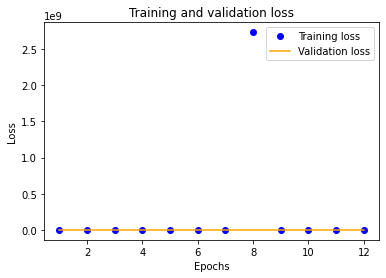

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


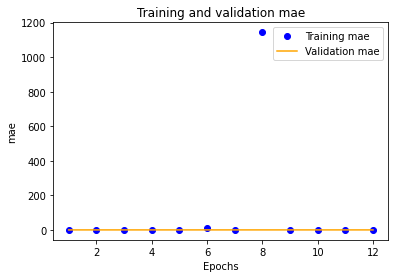

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

### Scatter plots

In [ ]:
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

16/16 [==============================] - 1s 39ms/step


#### compound

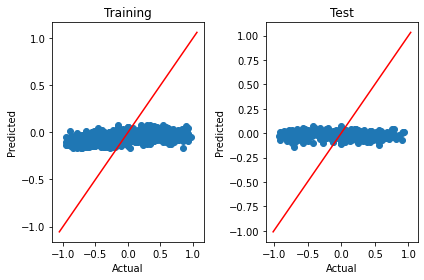

In [ ]:
x1=Y_train[:,0:1]
y1=pred_train[:,0:1]
x2=Y_test[:,0:1]
y2=pred_test[:,0:1]
drawscatterplot(x1,y1,x2,y2)

#### negative

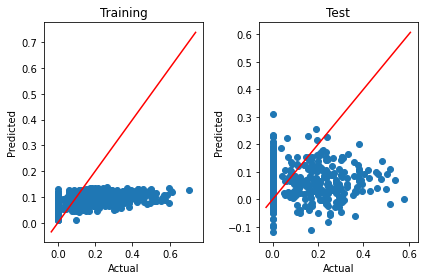

In [ ]:
x1=Y_train[:,1:2]
y1=pred_train[:,1:2]
x2=Y_test[:,1:2]
y2=pred_val[:,1:2]
drawscatterplot(x1,y1,x2,y2)

#### positive

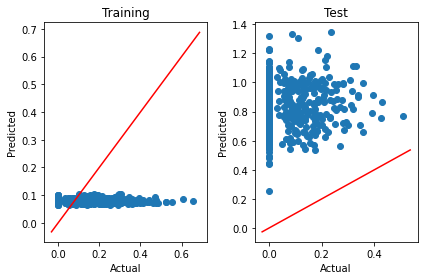

In [ ]:
x1=Y_train[:,2:3]
y1=pred_train[:,2:3]
x2=Y_test[:,2:3]
y2=pred_val[:,2:3]
drawscatterplot(x1,y1,x2,y2)

#### neutral

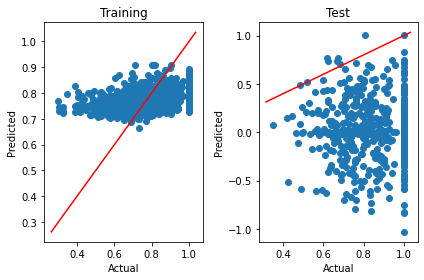

In [ ]:
x1=Y_train[:,3:4]
y1=pred_train[:,3:4]
x2=Y_test[:,3:4]
y2=pred_val[:,3:4]
drawscatterplot(x1,y1,x2,y2)

### Metrics

#### compound

In [ ]:
a1=Y_train[:,0:1]
b1=pred_train[:,0:1]
a2=Y_test[:,0:1]
b2=pred_test[:,0:1]
printmatrics1(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.310
Test Data  is 0.327

R-squared
Train Data is 0.106
Test Data  is -0.030

Mean sqaured value
Train Data : 0.161
Test Data  : 0.182


#### negative

In [ ]:
a1=Y_train[:,1:2]
b1=pred_train[:,1:2]
a2=Y_test[:,1:2]
b2=pred_test[:,1:2]
printmatrics1(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.098
Test Data  is 0.109

R-squared
Train Data is 0.088
Test Data  is -0.053

Mean sqaured value
Train Data : 0.016
Test Data  : 0.019


#### positive

In [ ]:
a1=Y_train[:,2:3]
b1=pred_train[:,2:3]
a2=Y_test[:,2:3]
b2=pred_test[:,2:3]
printmatrics1(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.084
Test Data  is 0.082

R-squared
Train Data is -0.005
Test Data  is -0.025

Mean sqaured value
Train Data : 0.010
Test Data  : 0.009


#### neutral

In [ ]:
a1=Y_train[:,3:4]
b1=pred_train[:,3:4]
a2=Y_test[:,3:4]
b2=pred_test[:,3:4]
printmatrics1(a1,b1,a2,b2)


Mean Absolute Error
Train Data is 0.120
Test Data  is 0.134

R-squared
Train Data is 0.085
Test Data  is -0.135

Mean sqaured value
Train Data : 0.021
Test Data  : 0.025


In [ ]:
!pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
analyser = SIA()
scores=[]
for i in range(len(df['tweet'])):
    
    score = analyser.polarity_scores(df['tweet'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df.loc[:,'sentiment']= sentiment
df.info()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.3 MB/s 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2002 non-null   object 
 1   date               2002 non-null   object 
 2   tweet              2002 non-null   object 
 3   BBC                2002 non-null   float64
 4   tweet_case_change  2002 non-null   object 
 5   Stemmed            2002 non-null   object 
 6   neg                2002 non-null   float64
 7   neu                2002 non-null   float64
 8   pos                2002 non-null   float64
 9   compound           2002 non-null   float64
 10  sentiment          2002 non-null   object 
dtypes: float64(5), object(6)
memory usage: 172.2+ KB


In [ ]:
temp = df.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,tweet
0,Negative,828
1,Neutral,649
2,Positive,525


# Part III: Analysis

####  Write five to ten bullets to compare your results and discuss how you improve the models by changing the architectures. Was your Deep Learning model able to 'steal' the logic of the nltk SentimentIntensityAnalyzer()? Make some comments about how deep learning is superior to rules-based systems like the nltk SentimentIntensityAnalyzer().



*   Based on our analysis of CNN International and BBC International tweets, we found that there were 828 negative tweets, 649 neutral tweets, and 525 positive tweets when combining 1000 tweets from both accounts.

*   As part of data cleaning, we changed the tweets to lowercase, removed special characters, and eliminated stop words in order to obtain refined data on which we analyzed a word cloud to determine the most frequently used words. We discovered that the words 'world', 'us,' and 'cup' were the most frequent ones on both accounts since the FIFA world cup has been trending these past few days.

*   Scoring analysis of the combined tweets was conducted using the nltk SentimentIntensityAnalyzer to determine negative, positive, neutral, and composite sentiment distributions. To test our analysis, we used the example "'Germany was knocked out of the 2022 World Cup on Thursday after an extraordinary ending to Group E, despite winning the match against Costa Rica'" whose score was 0.894, which appears to be accurate.

*   Our first model was run using CountVectorizer, which identified 6452 distinct words in our tweets. We partitioned our data by 70:30, and we trained the model with four dense layers and two dropout layers based on the tweets. The test results for the sentiments derived from the tweets are as follows.

    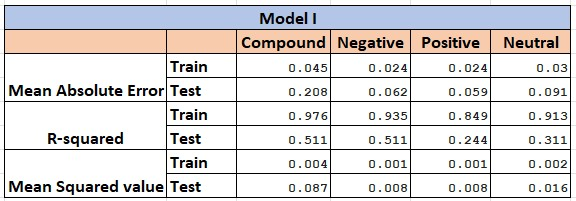

*   With the Tf-IDF Vectorizer, we were able to identify 6661 distinct words in the same tweet based on their significance. After partitioning the data at 70:30, we trained the model with four dense layers, two dropouts, and earlystopping. The test results for the sentiments derived from the tweets are as follows.

    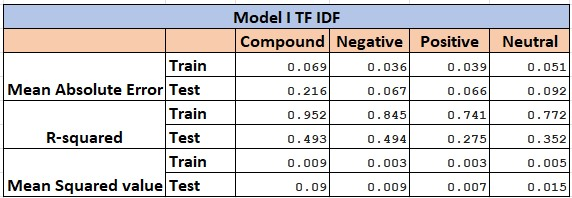

*   A second model used GloVe word embeddings and Keras tokenizer to generate numerical sequences from tweet text. We trained the model using an embedding layer flattened and fed into two dense layers and early stopping.

    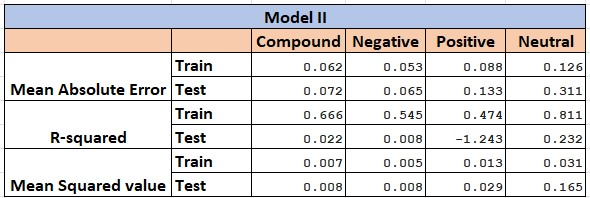

*   As part of our third model, we divided the dataset into 1500:500 tweets, extracted features from tweets, and generated labels and text by padding them using the Keras tokenizer. With the Keras tokenizer, we extracted features from tweets and generated labels and text by padding them. The model was then trained with a CNN bidirectional LSTM model with an embedding layer, max pooling, and GRU layer. The test results for the sentiments derived from the tweets are as follows:

    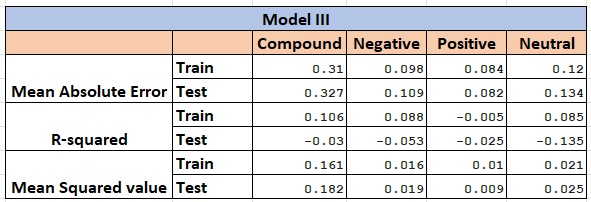

*   In order to optimize the model, we performed hyperparameter tuning experiments, including modifying the number of layers and features. It has been observed that models with more features perform better. Model III, however, overfits with different hyperparameter tunings, as shown in our results. Due to the limited amount of training data, this might be the case.

*   "Yes" Our model with TF-IDF was closest to the logic of nltk sentiment analyzer which is evident with the evaluation metrics provided for the model, for example our this model was able to predict negative sentiment accurately with RMSE: 0.009

*   If enough training data is provided, deep learning can be superior to rule-based systems as the deep learning model has a strong "learnability feature," which helps provide more accurate results. Another important feature of deep learning models is strong statistical inferences. For huge datasets, deep learning can provide a more easy and scalable architecture leading to more efficient and less time-consuming models.

